## Experiments: Comparing RSAST with other methods

In [11]:
from sast.sast import *
from sktime.datasets import load_UCR_UEA_dataset, tsc_dataset_names
from sktime.classification.kernel_based import RocketClassifier
import time
import pandas as pd
from sktime.transformations.panel.shapelet_transform import ShapeletTransform
import matplotlib.pyplot as plt
import os

### Reading Datasets

In [2]:
# Set directory where the csv files are located
directory = '/home/nirojasvar/random_sast/ResultsByClassifier'

# Create an empty list to store the dataframes
dfs = []

# Loop through all files in the directory
for filename in os.listdir(directory):
    # Check if the file starts with "df_overall_tunning" and ends with ".csv"
    if filename.endswith(".csv"):
        # Read the csv file into a dataframe
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)
        # Append the dataframe to the list
        df['filename']=filename
        dfs.append(df)

# Concatenate all the dataframes in the list into one dataframe
df_other_methods = pd.concat(dfs, ignore_index=True)
df_other_methods=df_other_methods[['filename','folds:','0']]
df_other_methods['method']=df_other_methods['filename'].str.split('_').str[0]
df_other_methods
df_other_methods=df_other_methods.rename(columns={'folds:':'dataset','0':'score'})
df_other_methods=df_other_methods[['dataset','score','method']]

# Set directory where the csv files are located
directory = '/home/nirojasvar/random_sast/ResultsRsast'

# Create an empty list to store the dataframes
dfs = []

# Loop through all files in the directory
for filename in os.listdir(directory):
    # Check if the file starts with "df_overall_tunning" and ends with ".csv"
    if filename.startswith("df_overall_tunning") and filename.endswith(".csv"):
        # Read the csv file into a dataframe
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath)
        # Append the dataframe to the list
        dfs.append(df)

# Concatenate all the dataframes in the list into one dataframe
df_result = pd.concat(dfs, ignore_index=True)
df_result.columns

Index(['Unnamed: 0', 'accuracy', 'time', 'cweights_time', 'fsubsequence_time',
       'tdataset_time', 'tclassifier_time', 'dataset_name', 'classifier_name',
       'rpoint', 'nb_per_class', 'method', 'len_method'],
      dtype='object')

In [3]:
df_result=df_result[['accuracy','dataset_name','classifier_name']]
df_result=df_result[df_result["classifier_name"]=="ACF&PACF: n_random_points=100 nb_inst_per_class=50"]
df_result.dataset_name.values


array(['SmoothSubspace', 'GunPoint', 'ItalyPowerDemand', 'ShapeletSim',
       'ItalyPowerDemand', 'Chinatown', 'BirdChicken', 'SyntheticControl',
       'Chinatown', 'GunPoint', 'ShapeletSim', 'SmoothSubspace',
       'ShapeletSim', 'Chinatown', 'SmoothSubspace', 'BirdChicken',
       'ItalyPowerDemand', 'GunPoint', 'BirdChicken'], dtype=object)

In [4]:

df_other_methods=df_other_methods.rename(columns={"dataset":"dataset_name","score":"accuracy","method":"classifier_name"})
df_other_methods = df_other_methods[df_other_methods['dataset_name'].isin(df_result.dataset_name.values)]
df_other_methods.columns

Index(['dataset_name', 'accuracy', 'classifier_name'], dtype='object')

In [5]:
# concatenate the two dataframes
concatenated_df = pd.concat([df_other_methods, df_result])

# reset the index of the concatenated dataframe
concatenated_df = concatenated_df.reset_index(drop=True)


In [6]:
concatenated_df['classifier_name'].unique()

array(['ROCKET', 'HIVE-COTEv1', 'BOSS', 'RISE', 'TSF', 'InceptionTime',
       'TS-CHIEF', 'S-BOSS', 'STC', 'ResNet', 'ProximityForest', 'WEASEL',
       'Catch22', 'cBOSS',
       'ACF&PACF: n_random_points=100 nb_inst_per_class=50'], dtype=object)

### Overall analysis

#### Accuracy: RSAST vs Other methods

In [7]:
# create a pivot table with the mean of score by hyperparameter
score_by_method=pd.pivot_table(concatenated_df, values='accuracy', index=['classifier_name'],columns=['dataset_name'], aggfunc='mean')
score_by_method


dataset_name,BirdChicken,Chinatown,GunPoint,ItalyPowerDemand,ShapeletSim,SmoothSubspace,SyntheticControl
classifier_name,,,,,,,
ACF&PACF: n_random_points=100 nb_inst_per_class=50,0.85,0.985423,0.982222,0.952381,0.887037,0.906667,0.333333
BOSS,0.95,0.766764,1.000000,0.908649,1.000000,0.393333,0.966667
Catch22,0.90,0.930435,0.946667,0.896016,0.994444,0.866667,0.970000
HIVE-COTEv1,1.00,0.979592,0.993333,0.962099,1.000000,0.980000,0.996667
InceptionTime,0.95,0.988338,1.000000,0.965986,0.994444,0.986667,0.996667
ProximityForest,0.85,0.971014,1.000000,0.965986,0.800000,1.000000,0.996667
RISE,0.95,0.959184,0.980000,0.953353,0.783333,0.873333,0.666667
ROCKET,0.90,0.982507,1.000000,0.968902,1.000000,0.980000,1.000000
ResNet,0.90,0.976812,0.993333,0.965015,0.755556,1.000000,0.996667


In [35]:
t_score_by_method=score_by_method.transpose()
t_score_by_method[["ACF&PACF: n_random_points=100 nb_inst_per_class=50","STC"]]

classifier_name,ACF&PACF: n_random_points=100 nb_inst_per_class=50,STC
dataset_name,,
BirdChicken,0.850000,0.950000
Chinatown,0.985423,0.967930
GunPoint,0.982222,0.993333
ItalyPowerDemand,0.952381,0.955296
ShapeletSim,0.887037,1.000000
SmoothSubspace,0.906667,0.933333
SyntheticControl,0.333333,0.996667


/tmp/ipykernel_10766/2497221041.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


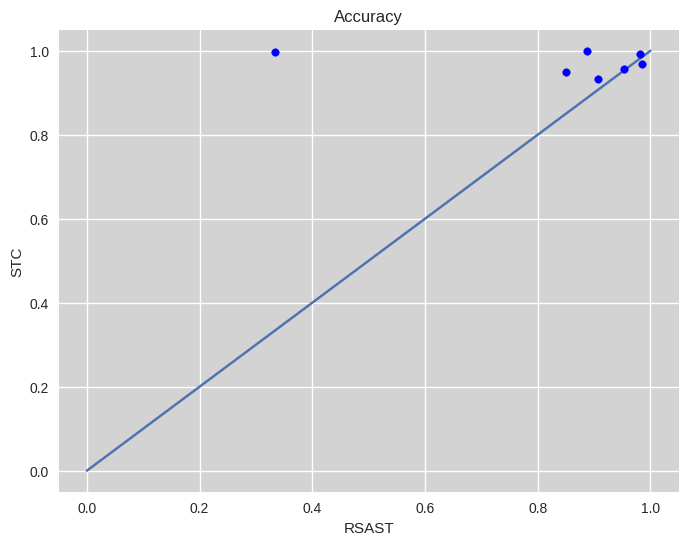

In [34]:
x=t_score_by_method["ACF&PACF: n_random_points=100 nb_inst_per_class=50"]
y=t_score_by_method["STC"]

# set the style of the plot
plt.style.use('seaborn')

# create the plot
fig, ax = plt.subplots(figsize=(8, 6))

# plot the line
ax.plot([0,1], [0,1])

# plot the points
ax.scatter(x, y, color='blue', edgecolor='blue', s=30, zorder=10)

# add labels and title
ax.set_xlabel('RSAST')
ax.set_ylabel('STC')
ax.set_title('Accuracy')

# set the background color
ax.set_facecolor('lightgrey')
plt.savefig('RSASTvsSTC.png')


In [ ]:
# create a pivot table with the variatioon of score by hyperparameter
pd.pivot_table(concatenated_df, values='accuracy', index=['classifier_name'],columns=['dataset_name'], aggfunc='var')


#### Generate CD Diagram RSAST vs Other Methods

In [ ]:
from cd_diagram.cd_function import *
df_perf=pd.pivot_table(concatenated_df, values='accuracy', index=['classifier_name','dataset_name'], aggfunc='mean')
df_perf=df_perf.reset_index()
draw_cd_diagram(df_perf, labels=True, title="Overall comparison", name_file='cd-diagram_overall_comparison.png')
_, average_ranks, _ = wilcoxon_holm(df_perf=df_perf)
min_rank= min(average_ranks)
average_ranks=pd.DataFrame(average_ranks)

In [ ]:
average_ranks